In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
data = pd.read_csv('heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [7]:
data.head()
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

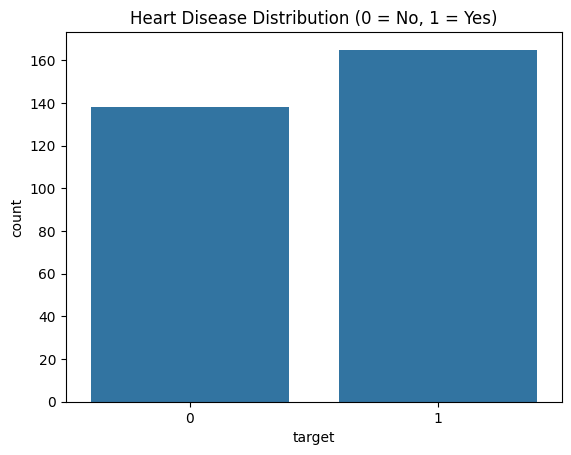

In [9]:
# check basic info
print(data.info())

# check summary statistics
print(data.describe())

# check for missing values
print(data.isnull().sum())

# check how many patients have disease vs no disease
print(data['target'].value_counts())

# plot count of target
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=data)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()


In [10]:
# Features = all columns except target
X = data.drop("target", axis=1)

# Target = the column we want to predict
y = data["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (303, 13)
Target shape: (303,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, "Testing set:", X_test.shape)


Training set: (242, 13) Testing set: (61, 13)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create the model
model = LogisticRegression(max_iter=1000)

# train the model
model.fit(X_train, y_train)

# make predictions on test set
y_pred = model.predict(X_test)

# check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8852459016393442


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[25  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Logistic Regression Accuracy: 0.8852
Decision Tree Accuracy: 0.7541
Random Forest Accuracy: 0.8361
SVM Accuracy: 0.7049


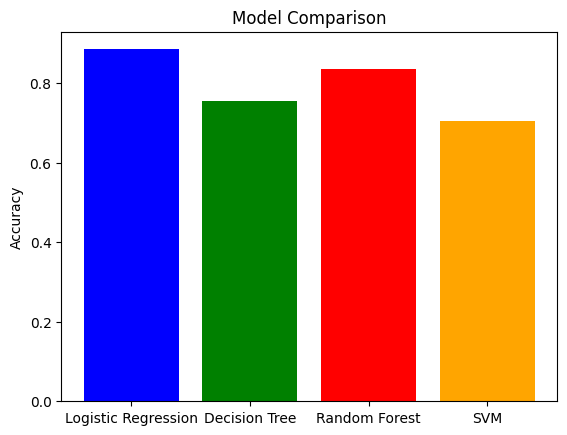

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Train and evaluate
from sklearn.metrics import accuracy_score

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Compare results
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color=['blue','green','red','orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [15]:
import joblib

# Save model
joblib.dump(models["Logistic Regression"], "heart_disease_model.pkl")

# Load model (later)
loaded_model = joblib.load("heart_disease_model.pkl")

# Test loaded model
print("Prediction from loaded model:", loaded_model.predict(X_test[:5]))


Prediction from loaded model: [0 1 1 0 1]
